In [ ]:
!pip install urlopen

In [63]:
import pandas as pd
import pandas_datareader as dr
# https://financialmodelingprep.com/developer/docs/

In [11]:
#!/usr/bin/env python

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url1 = ("https://financialmodelingprep.com/api/v3/profile/AAPL?period=quater&dataype=xls")
url = ("https://financialmodelingprep.com/api/v3/profile/AAPL?apikey=demo")
print(get_jsonparsed_data(url))

[{'symbol': 'AAPL', 'price': 127.2, 'beta': 1.203743, 'volAvg': 89753871, 'mktCap': 2122662674432, 'lastDiv': 0.835, 'range': '83.145-145.09', 'changes': 1.09, 'companyName': 'Apple Inc.', 'currency': 'USD', 'cik': '0000320193', 'isin': 'US0378331005', 'cusip': '037833100', 'exchange': 'Nasdaq Global Select', 'exchangeShortName': 'NASDAQ', 'industry': 'Consumer Electronics', 'website': 'http://www.apple.com', 'description': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, inc

In [42]:
# EAD : usually given by internal bank 
UGS = {'AAA': 0.69, 'BBB': 0.65, 'CCC': 0.44}
Ratings = 'BBB'
Bond = 500
Unused = 500

EAD = Bond + Unused*UGS[Ratings]
print("EAD: ", EAD)

EAD:  825.0


In [58]:
# PD : merton's model

from scipy.stats import norm
import numpy as np

def spreadMerton(A, K, tau, sigma, r):
  d1 = (np.log(A/K)+(r+sigma*sigma/2)*tau)/(sigma*np.sqrt(tau))
  d2 = d1 - sigma*np.sqrt(tau)
  s =  -1/tau*np.log(norm.cdf(d2)+A*np.exp(r*tau)*norm.cdf(-d1)/K)
  return s

def PD(A, K, T, t, sigma, r):
  DD = (np.log(A) - np.log(K) + (r - sigma*sigma/2)*(T-t))/(sigma*np.sqrt(T-t))
  return norm.cdf(-DD)

A = 100
K = 60
tau = 10
sigma = 0.3
mu = 0.1
t = 1
T = t + tau

print(spreadMerton(A, K, tau, sigma, mu))
print(PD(A, K, T, t, sigma, mu))

0.004497008966969396
0.1317390008082639


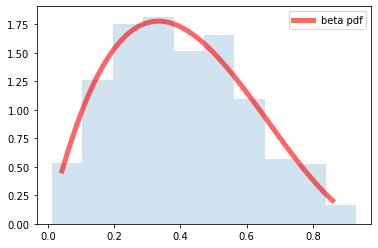

LGD: 0.5924667932830912


In [59]:
# LGD : beta distribution 
from scipy.stats import beta
import matplotlib.pyplot as plt

a = 2
b = 3
r = beta.rvs(a, b, size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')
plt.legend()
plt.show()

# fit beta
alpha, beta, loc, scale  = beta.fit(r)
LGD = 1 - (alpha/(alpha+beta))
print("LGD:", LGD)

In [60]:
EL = EAD*LGD*PD(A, K, T, t, sigma, mu)
print("EL: ",EL)

EL:  64.3920612713323
